# Cluster Analysis -  Agglomerative Algorithm - IRIS Data Set

In [457]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [458]:
iris=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")

In [459]:
iris.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [460]:
iris1 = iris.columns.to_frame().T.append(iris, ignore_index=True)
iris1.columns =['sepal_length','sepal_width','petal_length','petal_width','type']
iris1.head(10)

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [461]:
iris1.dtypes

sepal_length    object
sepal_width     object
petal_length    object
petal_width     object
type            object
dtype: object

In [462]:
iris1['sepal_length'] = iris1['sepal_length'].astype(float)
iris1['sepal_width'] = iris1['sepal_width'].astype(float)
iris1['petal_length'] = iris1['petal_length'].astype(float)
iris1['petal_width'] = iris1['petal_width'].astype(float)
iris1['type'] = iris1['type'].astype(str)

In [463]:
iris1.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
type             object
dtype: object

In [464]:
iris1.isnull().values.any()

False

In [465]:
iris1

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [466]:
print("First Ten rows")
print(iris1.head(10))
print("*********")
print("columns",iris1.columns)
print("*********")
print("shape:",iris1.shape)
print("*********")
print("Size:",iris1.size)
print("*********")
print("no of samples available for each type") 
print(iris1["type"].value_counts())

First Ten rows
   sepal_length  sepal_width  petal_length  petal_width         type
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa
*********
columns Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'type'], dtype='object')
*********
shape: (150, 5)
*********
Size: 750
*********
no of samples available for each type
Iris-versicolor    5

In [467]:
iris1.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [468]:
iris1.groupby('type').agg(['count', 'mean','std','min', 'max'])

sepal_length                            sepal_width         \
                       count   mean       std  min  max       count   mean   
type                                                                         
Iris-setosa               50  5.006  0.352490  4.3  5.8          50  3.418   
Iris-versicolor           50  5.936  0.516171  4.9  7.0          50  2.770   
Iris-virginica            50  6.588  0.635880  4.9  7.9          50  2.974   

                                    petal_length                             \
                      std  min  max        count   mean       std  min  max   
type                                                                          
Iris-setosa      0.381024  2.3  4.4           50  1.464  0.173511  1.0  1.9   
Iris-versicolor  0.313798  2.0  3.4           50  4.260  0.469911  3.0  5.1   
Iris-virginica   0.322497  2.2  3.8           50  5.552  0.551895  4.5  6.9   

                petal_width                             
                      count   mean       std  min  max  
type                                                    
Iris-setosa              50  0.244  0.107210  0.1  0.6  
Iris-versicolor          50  1.326  0.197753  1.0  1.8  
Iris-virginica           50  2.026  0.274650  1.4  2.5

In [469]:
#iris1.drop('type', axis=1, inplace = True )

In [470]:
iris1

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Pair Plot

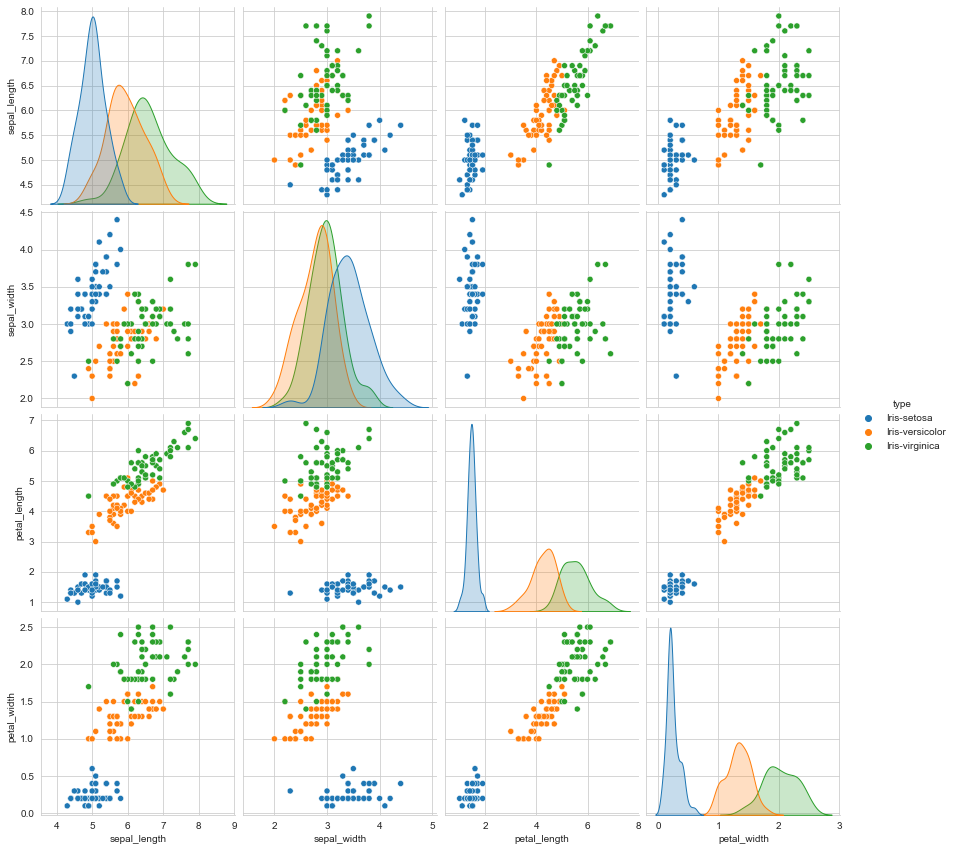

In [471]:
sns.set_style("whitegrid")
sns.pairplot(iris1,hue='type',height=3)
plt.show()

<AxesSubplot:xlabel='petal_width', ylabel='petal_length'>

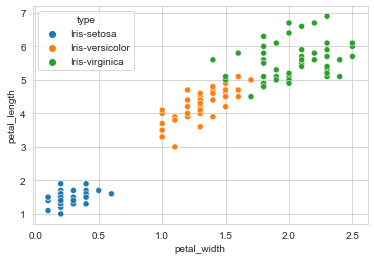

In [472]:
sns.scatterplot(data=iris1, x="petal_width", y="petal_length", hue = 'type')

# Assumed observations from  above plot

# Flow chart for Agglomerative Algorithm

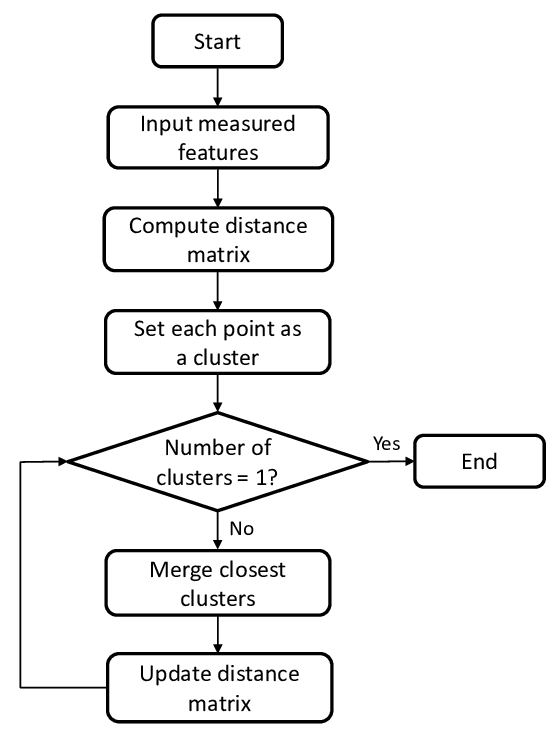

In [502]:
#first 6 rows of sepal widths and sepal length

iris_sort6 = iris1.iloc[0:6, 0:2]
iris_sort6

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
5,5.4,3.9


<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

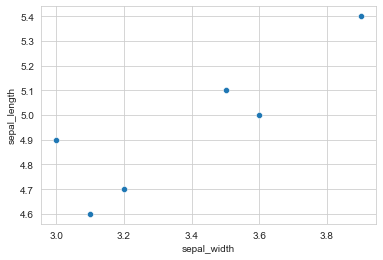

In [522]:
#plotting data points
sns.scatterplot(data=iris_sort6, x="sepal_width", y="sepal_length")

In [523]:
from scipy.spatial import distance_matrix 
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram

# Distance Matrix

In [524]:
#Distance Matrix Calculation for data points 0 - 5

Distance = pd.DataFrame(iris_sort6, columns=['sepal_width', 'sepal_length'])
pd.DataFrame(distance_matrix(Distance.values, Distance.values), index=Distance.index, columns=Distance.index)

,0,1,2,3,4,5
0,0.000000,0.538516,0.500000,0.640312,0.141421,0.500000
1,0.538516,0.000000,0.282843,0.316228,0.608276,1.029563
2,0.500000,0.282843,0.000000,0.141421,0.500000,0.989949
3,0.640312,0.316228,0.141421,0.000000,0.640312,1.131371
4,0.141421,0.608276,0.500000,0.640312,0.000000,0.500000
5,0.500000,1.029563,0.989949,1.131371,0.500000,0.000000


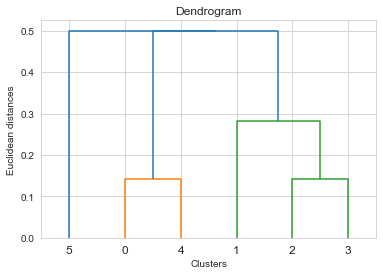

In [525]:
#Ploting dendrogram to identify optimal number of clusters

dendrogram = sch.dendrogram(sch.linkage(iris_sort6, method  = "single"))
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distances')
plt.show()

 look for the largest distance that we can vertically without crossing any horizontal line and count the number of lines on the diagram and determine the optimal number of clusters. Cluster number will be 6 for this dataset.

# No of Clusters = 6

In [526]:
model = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='single')
model.fit(iris_sort6)
model.labels_

array([5, 3, 4, 2, 1, 0], dtype=int64)

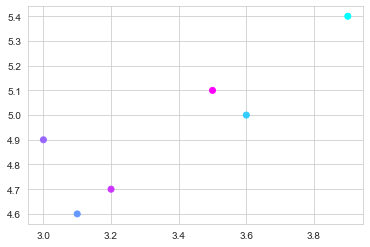

In [527]:
plt.scatter(iris_sort6['sepal_width'] ,iris_sort6['sepal_length'], c= model.labels_, cmap='cool')

# No of Clusters = 5

In [511]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='single')
model.fit(iris_sort6)
model.labels_

array([0, 3, 4, 2, 0, 1], dtype=int64)

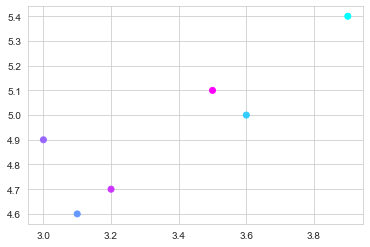

In [528]:
plt.scatter(iris_sort6['sepal_width'] ,iris_sort6['sepal_length'], c= model.labels_, cmap='cool')

# No of Clusters = 4

In [529]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')
model.fit(iris_sort6)
model.labels_

array([2, 3, 0, 0, 2, 1], dtype=int64)

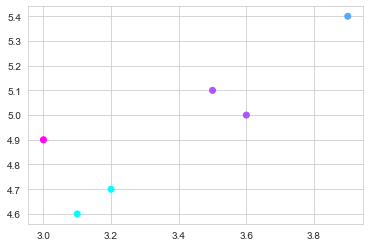

In [530]:
plt.scatter(iris_sort6['sepal_width'] ,iris_sort6['sepal_length'], c= model.labels_, cmap='cool')

# No of Clusters = 3

In [531]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
model.fit(iris_sort6)
model.labels_

array([2, 0, 0, 0, 2, 1], dtype=int64)

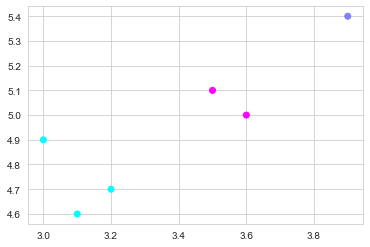

In [532]:
plt.scatter(iris_sort6['sepal_width'] ,iris_sort6['sepal_length'], c= model.labels_, cmap='cool')

# No of Clusters = 2

In [533]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
model.fit(iris_sort6)
model.labels_

array([0, 0, 0, 0, 0, 1], dtype=int64)

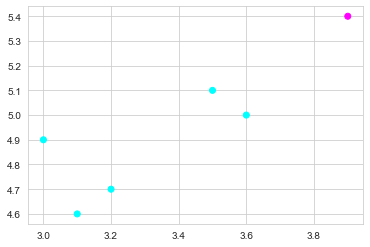

In [535]:
plt.scatter(iris_sort6['sepal_width'] ,iris_sort6['sepal_length'], c= model.labels_, cmap='cool')

# No of Clusters = 1

In [536]:
model = AgglomerativeClustering(n_clusters=1, affinity='euclidean', linkage='single')
model.fit(iris_sort6)
model.labels_

array([0, 0, 0, 0, 0, 0], dtype=int64)

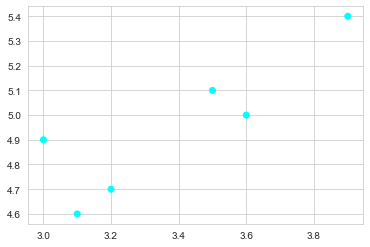

In [537]:
plt.scatter(iris_sort6['sepal_width'] ,iris_sort6['sepal_length'], c= model.labels_, cmap='cool')

In [521]:
#Cluster Map
#sns.clustermap(iris_sort, figsize=(6,5), method='single', cmap='viridis')
#plt.show()